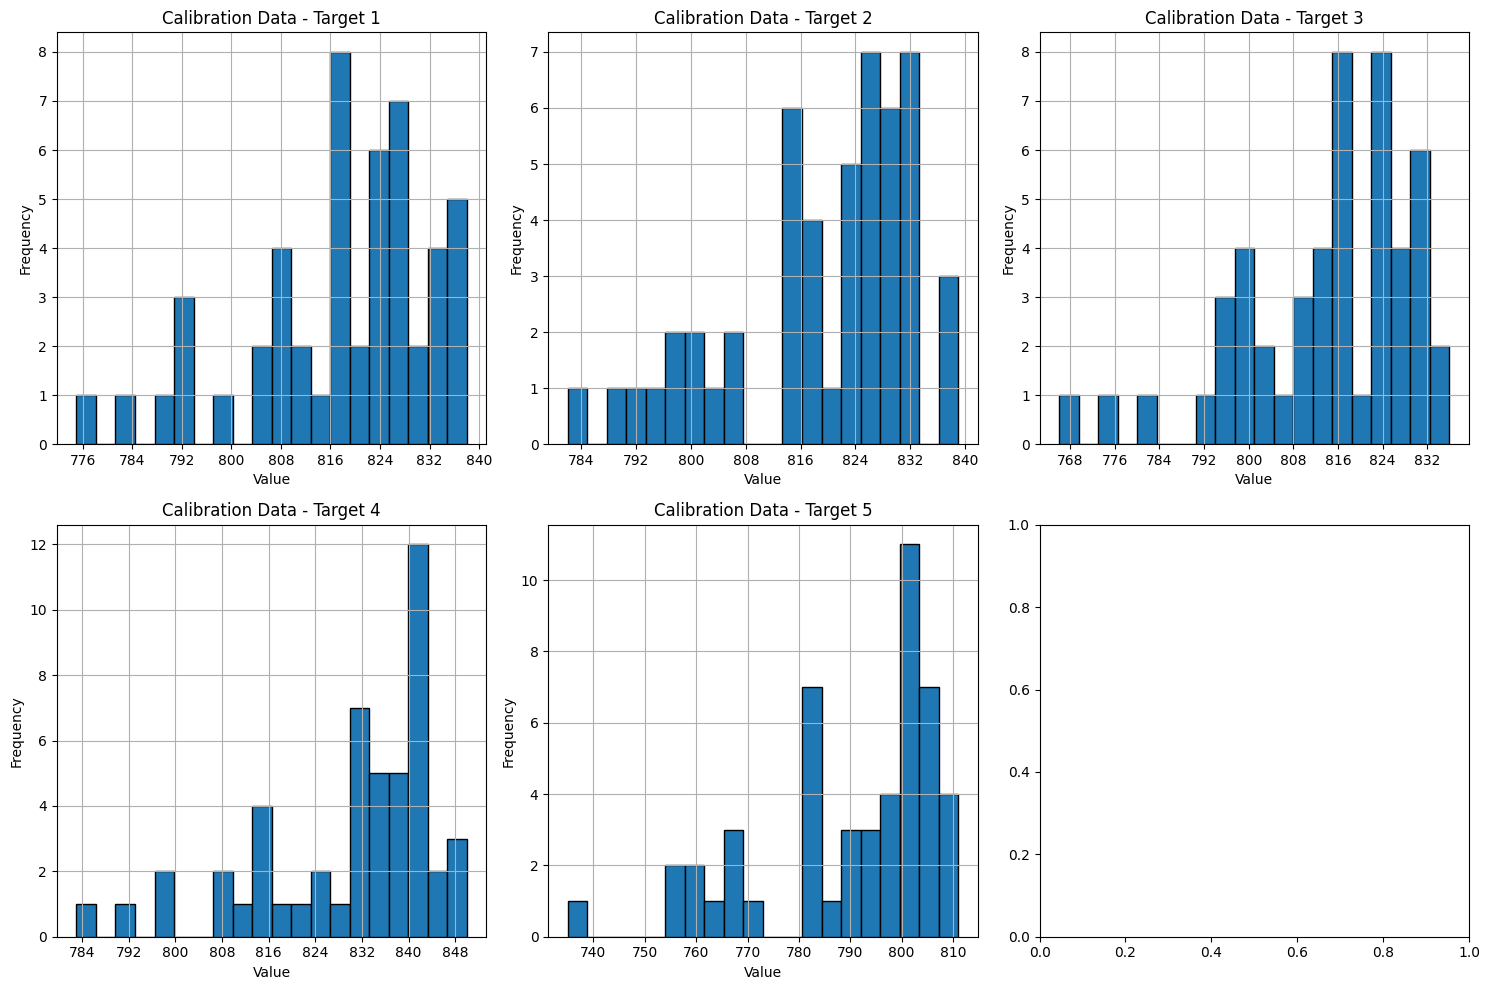

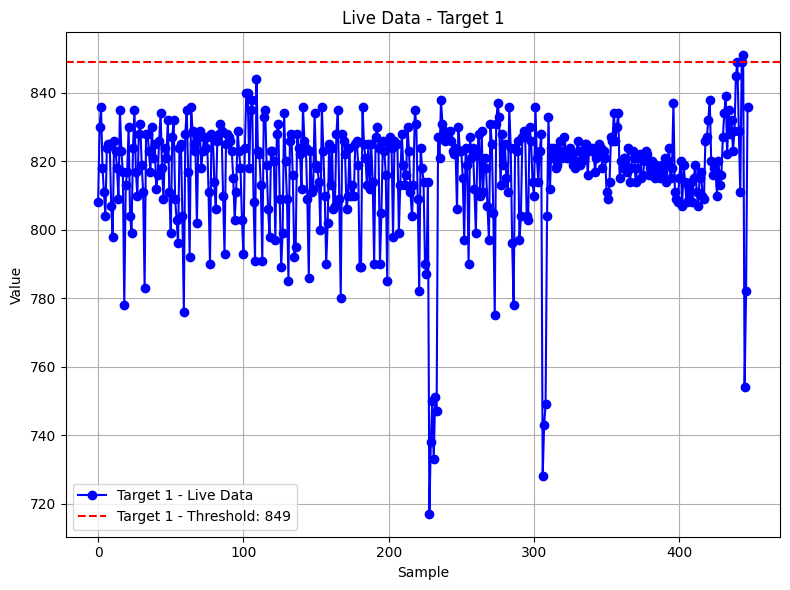

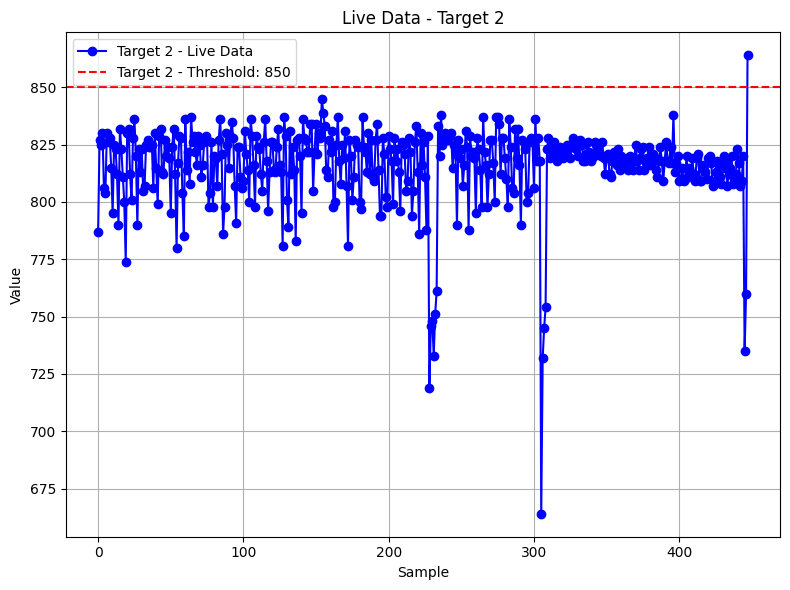

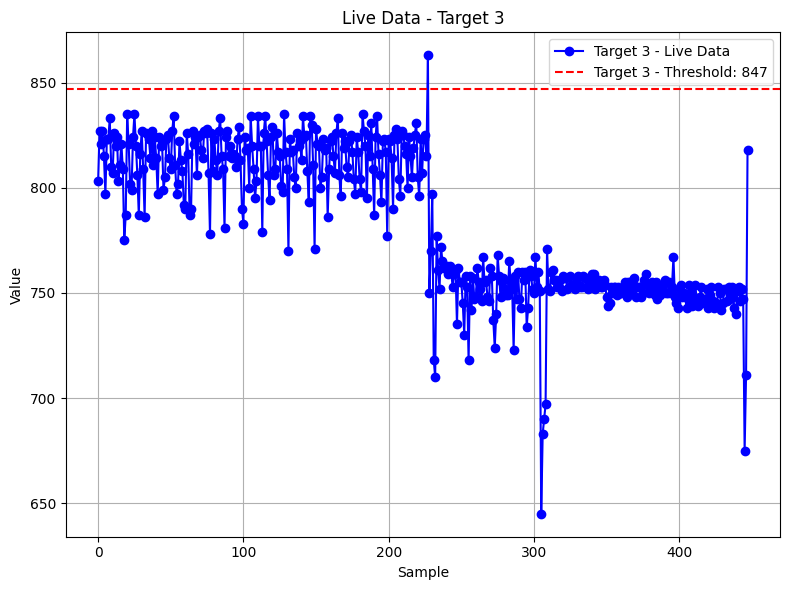

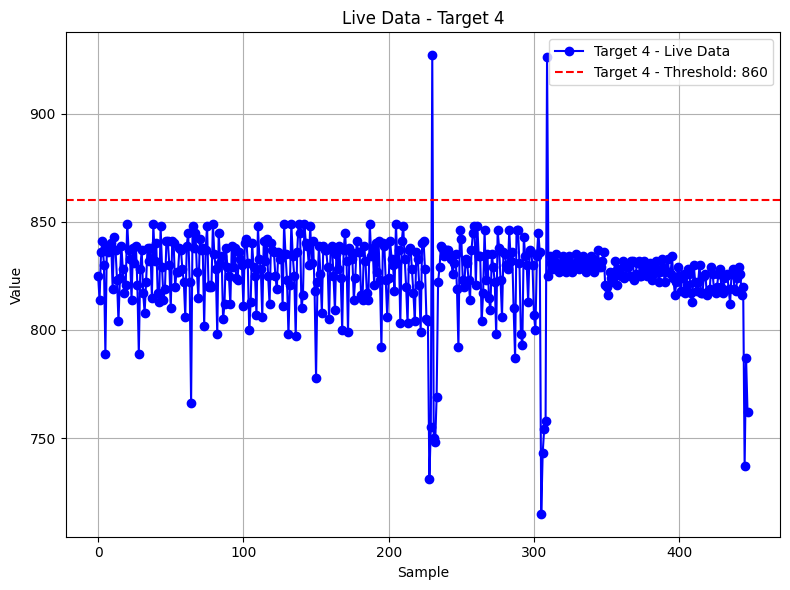

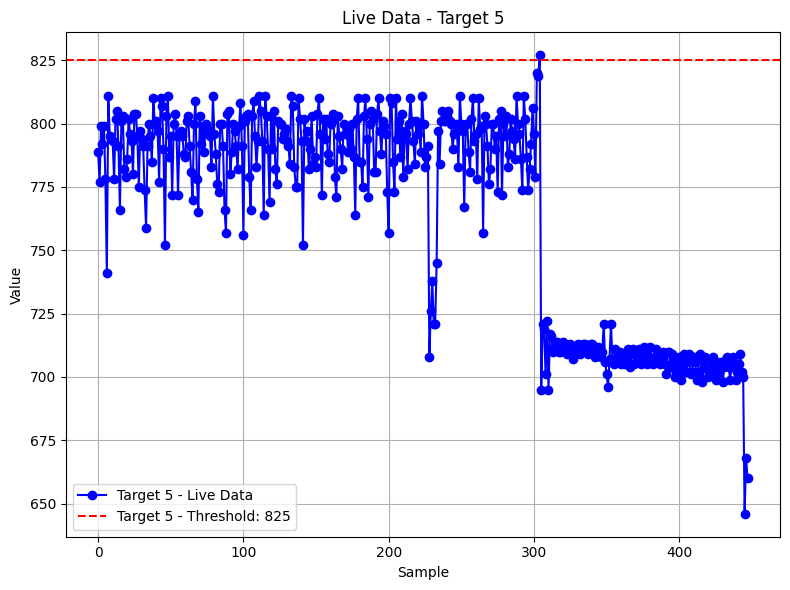

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read data from file
def read_data(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

        calibration_data = [[] for _ in range(5)]  # List of lists for calibration data
        thresholds = []
        live_data = [[] for _ in range(5)]  # List of lists for live data readings

        # Initialize state variables
        reading_calibration = False
        reading_thresholds = False
        reading_live_data = False

        for line in lines:
            line = line.strip()

            if line.startswith("Calibration threshold:"):
                target_num = int(line.split(":")[1].strip())
                reading_calibration = True
                reading_thresholds = False
                reading_live_data = False
            elif line.startswith("Threshold:"):
                reading_calibration = False
                reading_thresholds = True
                reading_live_data = False
            elif line.startswith("VALUE READ:"):
                reading_calibration = False
                reading_thresholds = False
                reading_live_data = True
            elif reading_calibration:
                try:
                    calibration_data[target_num - 1].append(int(line))
                except ValueError:
                    pass
            elif reading_thresholds:
                try:
                    thresholds.append(int(line))
                except ValueError:
                    pass
            elif reading_live_data:
                try:
                    values = [int(val) for val in line.split()]
                    live_data[target_num - 1].append(values)
                except ValueError:
                    pass

        # Convert lists to numpy arrays
        calibration_data = [np.array(arr) for arr in calibration_data]
        thresholds = np.array(thresholds)
        live_data = [np.array(arr) for arr in live_data]

        return calibration_data, thresholds, live_data

    except Exception as e:
        print(f"Error reading the file: {e}")
        return None

# Function to plot histograms for each target
def plot_histograms(calibration_data):
    try:
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

        for i in range(5):
            row = i // 3
            col = i % 3
            ax = axs[row, col]
            ax.hist(calibration_data[i], bins=20, edgecolor='black')
            ax.set_title(f'Calibration Data - Target {i+1}')
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
            ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Show integer ticks on x-axis
            ax.grid(True)

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting histograms: {e}")

# Function to plot live data with threshold for a specific target
def plot_live_data_target(live_data, thresholds, target_num):
    try:
        fig, ax = plt.subplots(figsize=(8, 6))
        
        ax.plot(live_data[5 - 1][:, target_num-1], linestyle='-', marker='o', color='b', label=f'Target {target_num} - Live Data')
        ax.axhline(y=thresholds[target_num - 1], linestyle='--', color='r', label=f'Target {target_num} - Threshold: {thresholds[target_num - 1]}')

        ax.set_title(f'Live Data - Target {target_num}')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting live data: {e}")



# Example usage
if __name__ == "__main__":
    file_path = 'arduino_data.txt'
    calibration_data, thresholds, live_data = read_data(file_path)

    plot_histograms(calibration_data)



    # Plot live data and threshold for each target
    for i in range(1, 6):
        plot_live_data_target(live_data, thresholds, i)